In [2]:
using PyPlot, Printf

include("decode.jl")
include("utils.jl")
include("updateRule.jl")

particleFiltering (generic function with 2 methods)

In [39]:
function decodeSurprise(seq, m, alpha_0, rule)
    # define callback
    surprises = zeros(length(seq))
    thetas = zeros(length(seq))
    idx = 1
    function callback(x_t, col)
        surprises[idx] = rule.computeSurprise(x_t, col, alpha_0[:,col])
        thetas[idx] = rule.computeTheta(col)
        idx += 1
    end

    # decode sequence
    decode(seq, m, alpha_0, rule, callback)
    
    return surprises, thetas
end

decodeSurprise (generic function with 1 method)

In [3]:
function plotSurprise(surprises, start, stop, params)
    len = length(surprises)

    # plot
    xAll = range(1, len, length=len)
    x = xAll[start:stop]
    y = surprises[start:stop]
    
    plot(x, y, label=@sprintf("m = %i", params["m"]))
    xlabel("t")
    ylabel("S_{BF}")
    title(@sprintf("%s using update rule %s", params["title"], params["rule"]))
    grid("on")
    legend()

end

plotSurprise (generic function with 1 method)

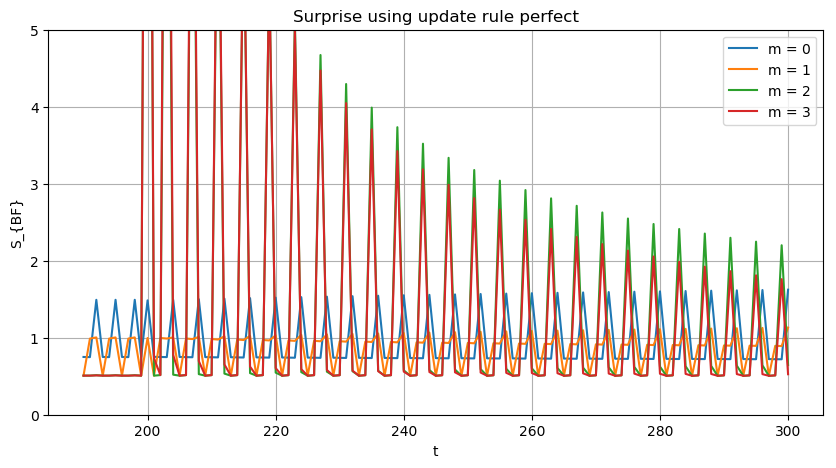

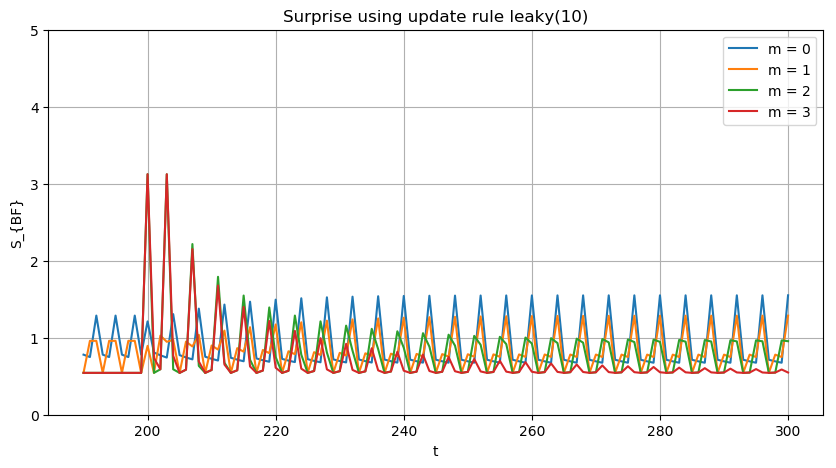

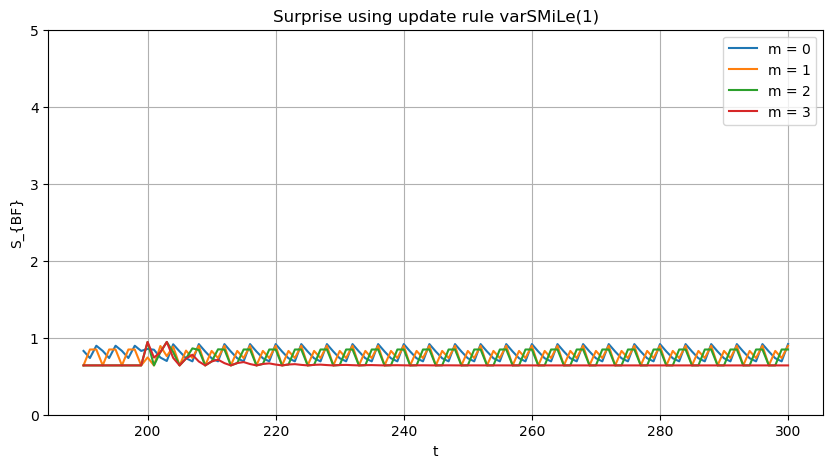

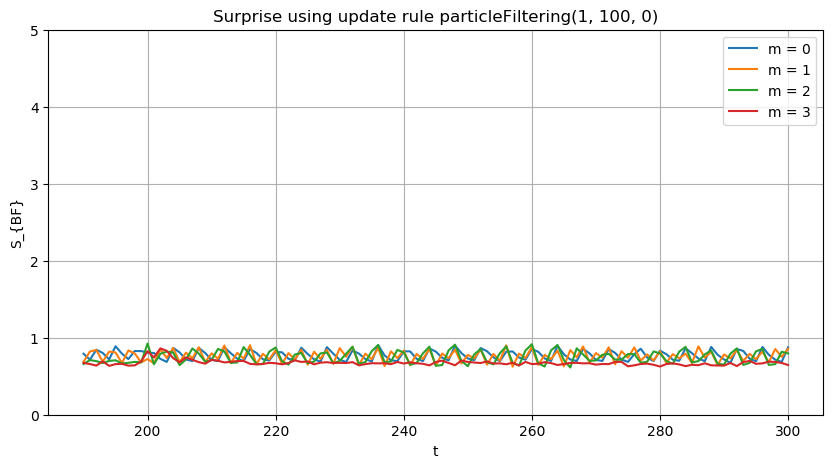

In [44]:
# generate sequence { 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 ... }
len = 400
seq = Array{Int32}(undef, len)
for i = 1:len÷2
    seq[i] = i % 3 == 0
end

for i = len÷2:len
    seq[i] = i % 4 == 0
end

# plot parameters
start = 190
stop = 300

# rules to plot
rules = [perfect(), leaky(10), varSMiLe(1), particleFiltering(1, 100, 0)]
names = ["perfect", "leaky(10)", "varSMiLe(1)", "particleFiltering(1, 100, 0)"]
m_values = [0, 1, 2, 3]

for (rule, name) in zip(rules, names)
    # reset figure
    fig, ax = subplots(figsize=(10,5))

    for m in m_values
                
        # define initial params
        alpha_0 = ones(2, 2^m)

        # decode sequence
        surprises, thetas = decodeSurprise(seq, m, alpha_0, rule)

        # plot surprises
        params = Dict("title" => "Surprise", "m" => m, "rule" => name)
        plotSurprise(surprises, start, stop, params)
        
        # add y lim
        ax = gca()    
        ax.set_ylim([0,5])
    end
end

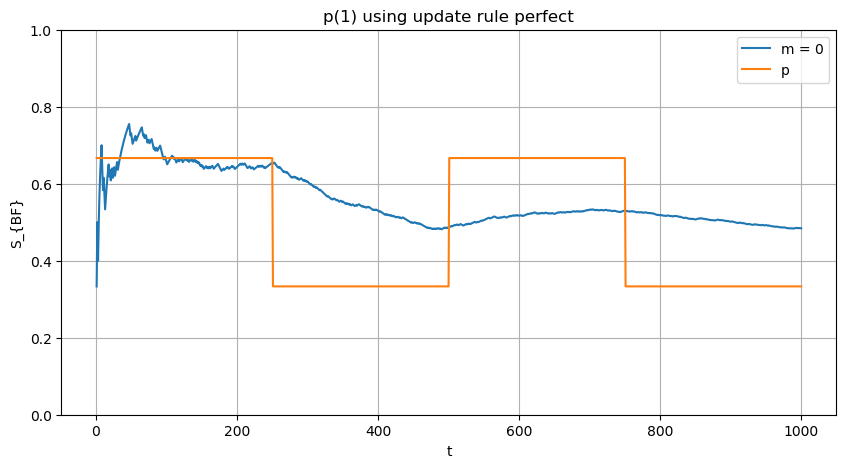

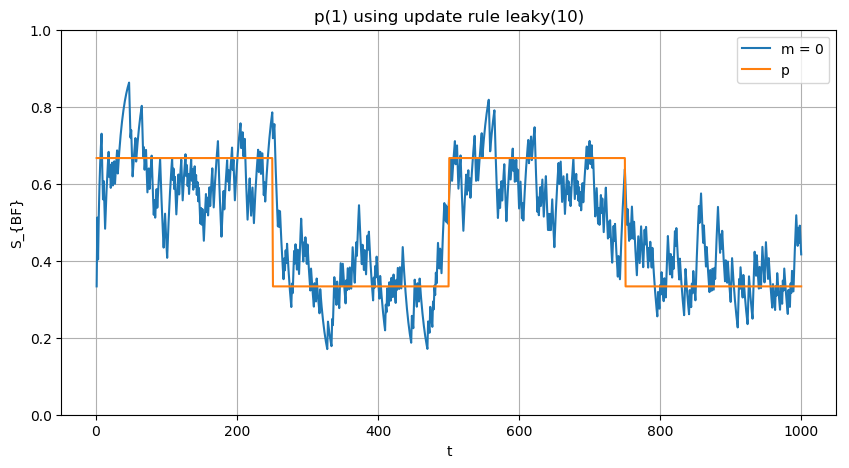

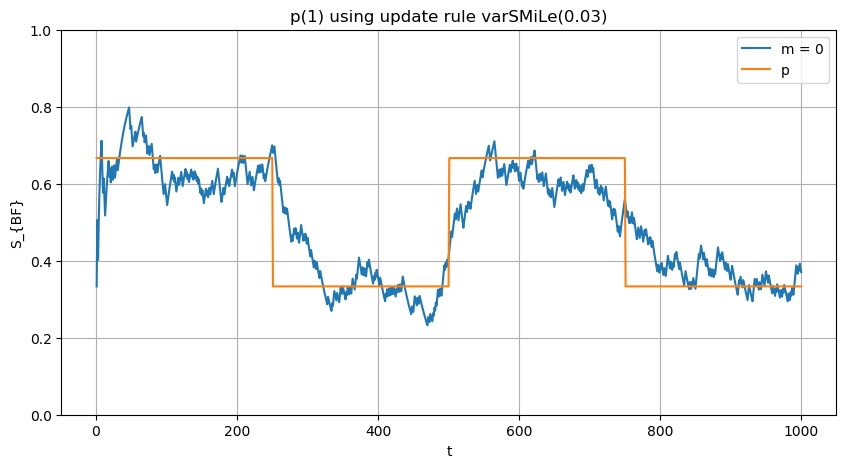

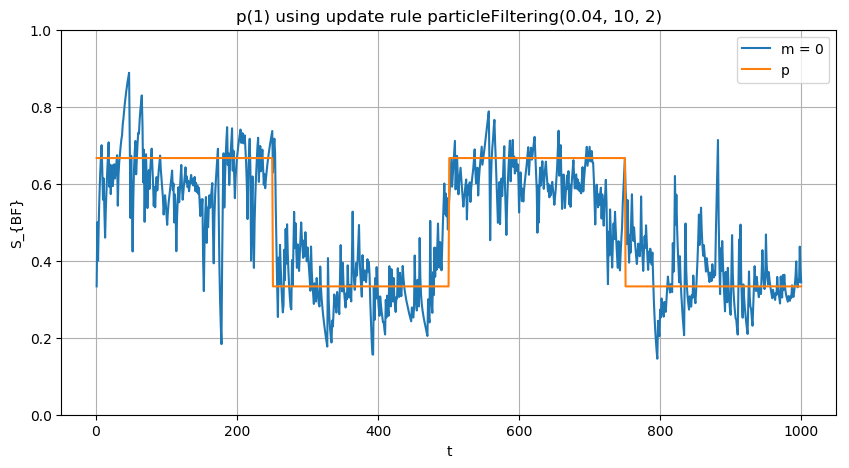

In [37]:
# generate sequence
len = 1000
seq = Array{Int32}(undef, len)

phigh = 2.0/3.0 * ones(250)
plow = 1.0/3.0 * ones(250)
p = vcat(phigh, plow, phigh, plow)

for i = 1:len
    seq[i] = rand() > p[i]
end

# plot parameters
start = 1
stop = 1000

# rules to plot
rules = [perfect(), leaky(10), varSMiLe(0.03), particleFiltering(0.04, 10, 2)]
names = ["perfect", "leaky(10)", "varSMiLe(0.03)", "particleFiltering(0.04, 10, 2)"]
m = 0

for (rule, name) in zip(rules, names)
    # reset figure
    fig, ax = subplots(figsize=(10,5))
                
    # define initial params
    alpha_0 = ones(2, 2^m)

    # decode sequence
    surprises, thetas = decodeSurprise(seq, m, alpha_0, rule)

    # plot surprises
    params = Dict("title" => "p(1)", "m" => m, "rule" => name)
    plotSurprise(thetas, start, stop, params)
    
    # add p
    plot(range(1, len, length=len)[start:stop], p, label="p")
    legend()
    
    # add y limits from 0 - 1
    ax = gca()    
    ax.set_ylim([0,1])
end